<a href="https://colab.research.google.com/github/Nirmalasari16/Skripsi/blob/master/Untitled.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

from matplotlib import pyplot as plt

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [24]:
#load dataset
dataset = pd.read_csv('/content/drive/My Drive/cardio_train.csv')
print (len(dataset))
#dataset.Type.value_count().plot(kind= "bar")
dataset

70000


id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0                  0;18393;2;168;62.0;110;80;1;1;0;0;1;0                               
1                  1;20228;1;156;85.0;140;90;3;1;0;0;1;1                               
2                  2;18857;1;165;64.0;130;70;3;1;0;0;0;1                               
3                 3;17623;2;169;82.0;150;100;1;1;0;0;1;1                               
4                  4;17474;1;156;56.0;100;60;1;1;0;0;0;0                               
...                                                  ...                               
69995          99993;19240;2;168;76.0;120;80;1;1;1;0;1;0                               
69996         99995;22601;1;158;126.0;140;90;2;2;0;0;1;1                               
69997         99996;19066;2;183;105.0;180;90;3;1;0;1;0;1                               
69998          99998;22431;1;163;72.0;135;80;1;2;0;0;0;1                               
69999          99999;20540;1;170;72.0;120;80;2;1;0;0;1;0                               

[70000 rows x 1 columns]

In [0]:
#replace NaN
zero_not_accepted = [ 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco','active','cardio']
for colum in zero_not_accepted:
   # dataset [colum] = dataset[colum].replace(0, np.NaN)
    mean = int(dataset[colum].mean(skipna=True))
    dataset[colum] = dataset[colum].replace(np.NaN, mean)

In [0]:
#split target and attribute
x = dataset.iloc[:, 1:10]
y = dataset.iloc[:, 10]
#split train n test dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0, test_size=0.1)
print(len(y_test))
print(len(dataset))

7000
70000


Text(0.5, 1.0, 'testing')

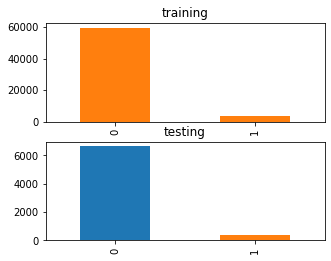

In [0]:
x_train
x_test
y_train
len(y_test)

pp.figure(figsize=(5,4))
pp.subplot(2,1,1);y_train.value_counts().plot(kind='bar', color=['C1','C1','C2','C3','C4','C5','C6']);pp.title('training')
pp.subplot(2,1,2);y_test.value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6']);pp.title('testing')

In [0]:
# scaling data
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)
x_train

array([[-1.43189008, -0.7347468 ,  0.80793253, ..., -0.54039178,
        -0.39585685, -0.31090676],
       [-0.58084582, -0.7347468 ,  1.2948251 , ..., -0.54039178,
        -0.39585685, -0.31090676],
       [ 1.34616153, -0.7347468 ,  0.07759367, ..., -0.54039178,
        -0.39585685, -0.31090676],
       ...,
       [ 1.18081579,  1.36101307,  1.17310196, ..., -0.54039178,
        -0.39585685, -0.31090676],
       [-0.46615748, -0.7347468 , -1.38308404, ..., -0.54039178,
        -0.39585685, -0.31090676],
       [ 0.38610256,  1.36101307,  0.56448624, ..., -0.54039178,
        -0.39585685, -0.31090676]])

In [0]:
math.sqrt(100)

10.0

In [0]:
#choose method and fitting
model = GaussianNB()
model.fit (x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
#testing data
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [0]:
#print result
cm = confusion_matrix(y_test , y_pred)
print (cm)
print("akurasi :" , accuracy_score(y_test, y_pred))
print("presisi :" , precision_score(y_test, y_pred))
print("recall :" , recall_score(y_test, y_pred))
print("f1-score :" , f1_score(y_test, y_pred))

[[6548   87]
 [ 331   34]]
akurasi : 0.9402857142857143
presisi : 0.2809917355371901
recall : 0.09315068493150686
f1-score : 0.13991769547325103


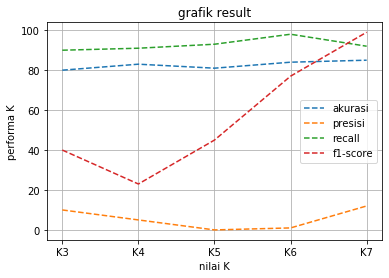

In [0]:
from matplotlib import pyplot as plot
x = ["K3", "K4", "K5", "K6", "K7"]
a= [80,83,81,84,85]
p= [10,5,0,1,12]
r= [90,91,93,98,92]
f= [40,23,45,77,99]
plt.plot(x, a, '--')
plt.plot(x, p, '--')
plt.plot(x, r, '--')
plt.plot(x, f, '--')
plt.title("grafik result")
plt.xlabel("nilai K")
plt.ylabel("performa K")
plt.legend(["akurasi","presisi", "recall", "f1-score"])
plt.grid()
plt.show()
